# Predicting Heart Disease Using Machine Learning 

## Python based machine learning and data science libraries in an attmept to build a machine learning model  that can predict whether or not someone has heart disease based on their medical attributes. 

### Purpose of Project - To demonstrate real life example of what a data science and machine learning proof of concept might look like.

#### The original data set came from the Cleavland data UCI Machine Learning Repository:
https:/archive.ics.uci.edu/ml/datasets/heart+Disease 

There is also a version of it available on Kaggle. https://kaggle.com/ronitf/heart-disease-uci 


##### Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.

- Model training - create model(s) to learn to predict a target variable based on other variables.
- Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
- Model comparison - comparing several different models to find the best one.
- Model fine-tuning - once we've found a good model, how can we improve it?
- Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
- Cross-validation - if we do build a good model, can we be sure it will work on unseen data?
- Reporting what we've found - if we had to present our work, what would we show someone?

Method to solve this:

__1. Problem Definition__ 

In our case, the problem we will be exploring is binary classification (a sample can only be one of two things). This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not. In a statement, Given clinical parameters about a patient, can we predict whether or not they have heart disease?


__2. Data__ 

What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect. The original data came from the Cleveland database from UCI Machine Learning Repository. Howevever, we've downloaded it in a formatted way from Kaggle. The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable. Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable. We use the independent variables to predict our dependent variable. Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.


__3. Evaluation__ 

The evaluation metric is something you might define at the start of a project. Since machine learning is very experimental, you might say something like, If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project. The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards. However, due to the nature of experimentation, the evaluation metric may change over time.


__4. Features__ 

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data. One of the most common ways to do this, is to create a data dictionary.



-------

# Preparing the tools

This project needs pandas, Matplotlib and Numpy

In [2]:
#Import libraries needed 

#Regular EDA and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Configure plots inside notebook
%matplotlib inline 

#Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [3]:
#Import Data from csv file 
df = pd.read_csv('heart-disease.csv')

#Rows and columns
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

#### The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

- What question(s) are you trying to solve?
- What kind of data do we have and how do we treat different types?
- What's missing from the data and how do you deal with it?
- Where are the outliers and why should you care about them?
- How can you add, change or remove features to get more out of your data?

# Dictionary for Dataset 

- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type 0: Typical angina: chest pain related decrease blood supply to the heart 1: Atypical angina:  chest pain not related to heart 2: Non-anginal pain: typically esophageal spasms (non heart related) 3: Asymptomatic: chest pain not showing signs of disease
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
  anything above 130-140 is typically cause for concern
- chol - serum cholestoral in mg/dl
- serum = LDL + HDL + .2 * triglycerides
  above 200 is cause for concern
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  '>126' mg/dL signals diabetes
- restecg - resting electrocardiographic results 0: Nothing to note 1: ST-T Wave abnormality
  can range from mild symptoms to severe problems
- signals non-normal heart beat 2: Possible or definite left ventricular hypertrophy
  Enlarged heart's main pumping chamber
- thalach - maximum heart rate achieved
  exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
  looks at stress of heart during excercise unhealthy heart will stress more
- slope - the slope of the peak exercise ST segment 0: Upsloping: better heart rate with excercise (uncommon) 1: - - Flatsloping: minimal change (typical healthy heart) 2: Downslopins: signs of unhealthy heart
- ca - number of major vessels (0-3) colored by flourosopy
  colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)
- thal - thalium stress result
  1,3: normal
- 6: fixed defect: used to be defect but ok now
- 7: reversable defect: no proper blood movement when excercising
- target - have disease or not (1=yes, 0=no) (= the predicted attribute)



In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# Predict target variable 

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

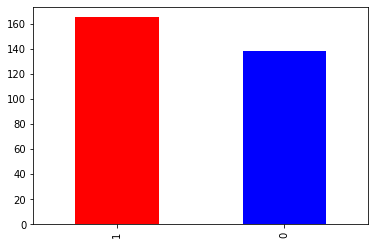

In [11]:
df['target'].value_counts().plot(kind = 'bar', color=['red', 'blue']);

- 1 = yes heart disease
- 2 = no heart disease 

In [12]:
#Data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
#missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
#stats info
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Finding Patterns of the data

- Compare different columns to get the relations between the important columns to answer the questions

In [17]:
# Gender to Heart disease pattern
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

- 1 = Male
- 0 = Female 

In [18]:
#Crosstab with gender / target 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


#### Based on this data

- women have 75% chance
- men have 44%

- Total average = 66% 

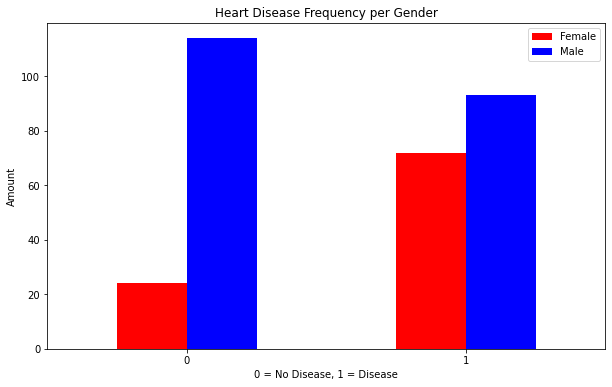

In [25]:
#Create a plot
pd.crosstab(df.target, df.sex).plot(kind= 'bar',
                                   figsize = (10,6),
                                   color=['red', 'blue'])

plt.title("Heart Disease Frequency per Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);